<a href="https://colab.research.google.com/github/Navyasri28/Python-practices/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer churn**

-- Customer churn is the rate at which customers leave a company.

-- Causes include switching to competitors, canceling subscriptions due to poor service, or insufficient engagement.

-- Customer churn analysis helps in retaining profitable customers, particularly in the telecom industry.

## **Load the data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("customer churn.csv")
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

## **Study the data**

In [4]:
# Display the first few rows of the dataset
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
# Get summary statistics of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **Null values**

In [6]:
# Identifying null values

print(df.isnull())

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False          

In [7]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:
# Display rows with missing TotalCharges values
missing_total_charges = df[df['TotalCharges'].isnull()]
print(missing_total_charges)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [10]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print(df['TotalCharges'].isnull().sum())

0


## **Outliers**

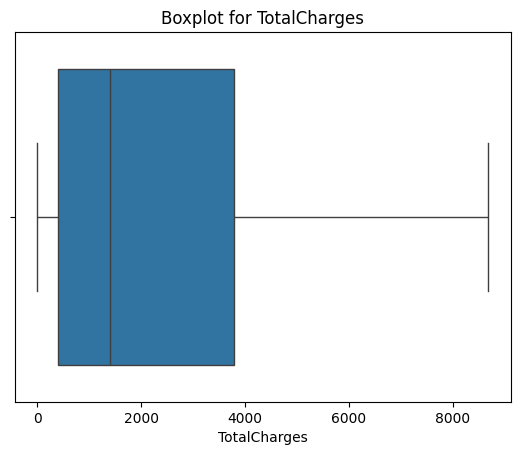

In [11]:
sns.boxplot(x=df['TotalCharges'])
plt.title('Boxplot for TotalCharges')
plt.show()

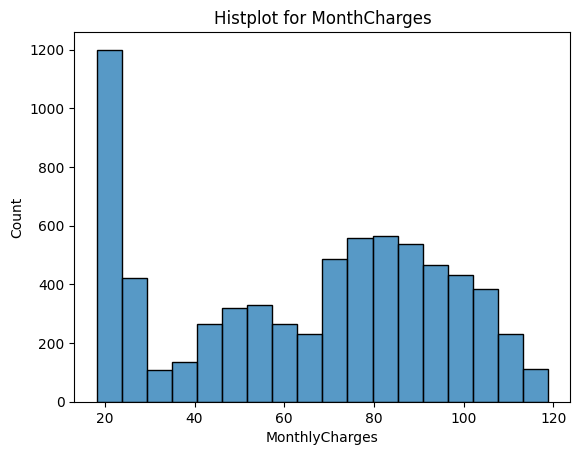

In [12]:
sns.histplot(df['MonthlyCharges'])
plt.title('Histplot for MonthCharges')
plt.show()

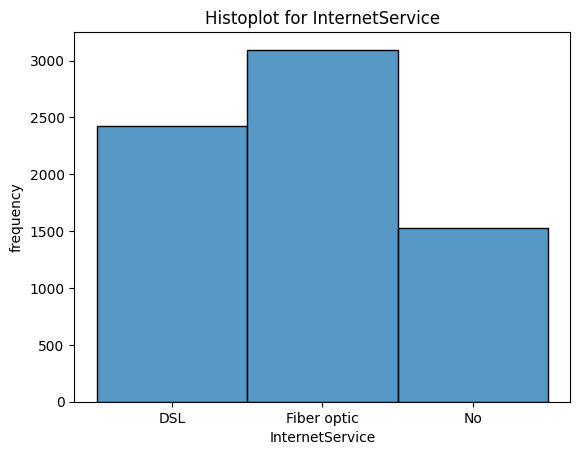

In [13]:
sns.histplot(df['InternetService'])
plt.title('Histoplot for InternetService')
plt.ylabel('frequency')
plt.show()

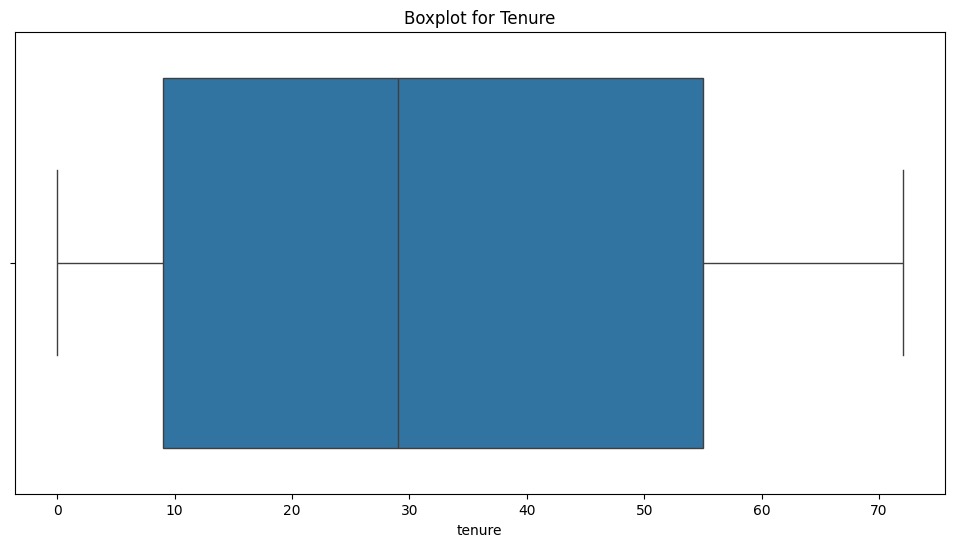

In [14]:
# Plot boxplot to detect outliers in numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['tenure'])
plt.title('Boxplot for Tenure')
plt.show()

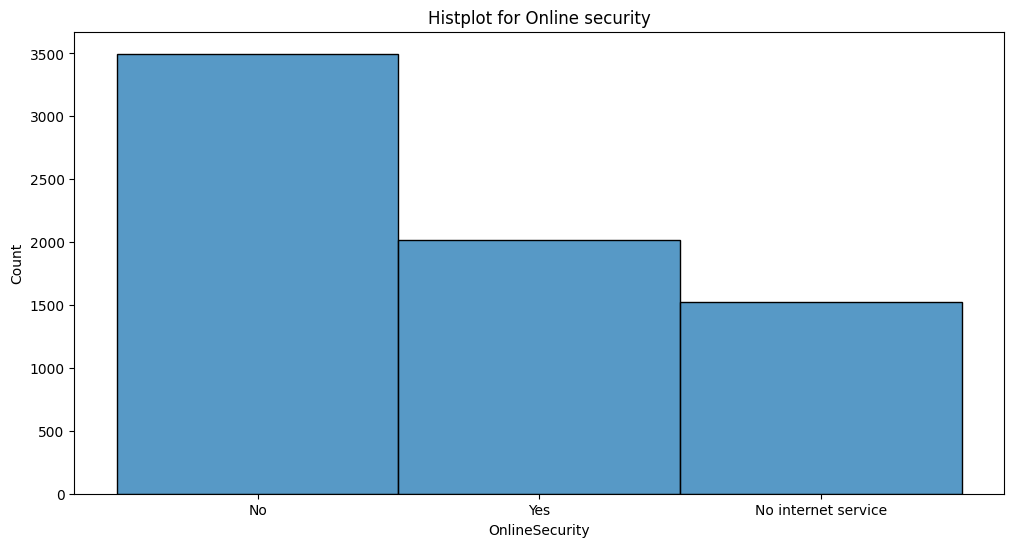

In [15]:
# Plot boxplot to detect outliers in numerical columns
plt.figure(figsize=(12, 6))
sns.histplot(x=df['OnlineSecurity'])
plt.title('Histplot for Online security')
plt.show()

# **Analysis**

## **Univar analysis**

Univariate analysis involves examining each variable individually to summarize and understand its characteristics. We will look at the distribution and basic statistics of both numerical and categorical variables.

In [16]:
# Summary statistics for numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
summary_statistics = df[numerical_columns].describe()
print("Summary Statistics for Numerical Variables:")
print(summary_statistics)


Summary Statistics for Numerical Variables:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


These statistics help in understanding the central tendency, dispersion, and range of the data.

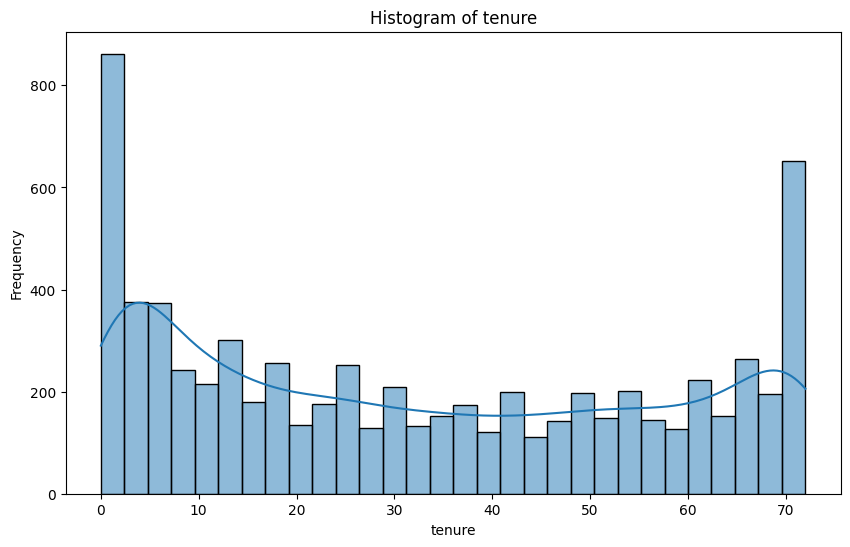

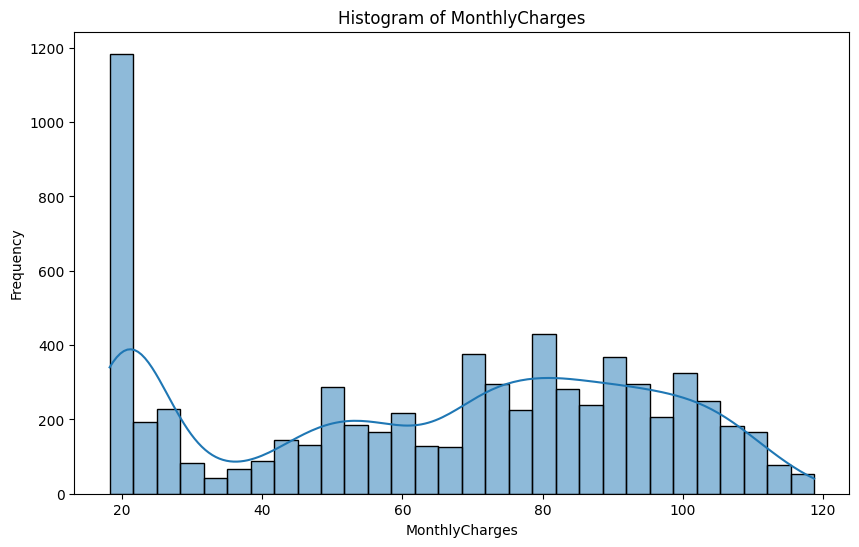

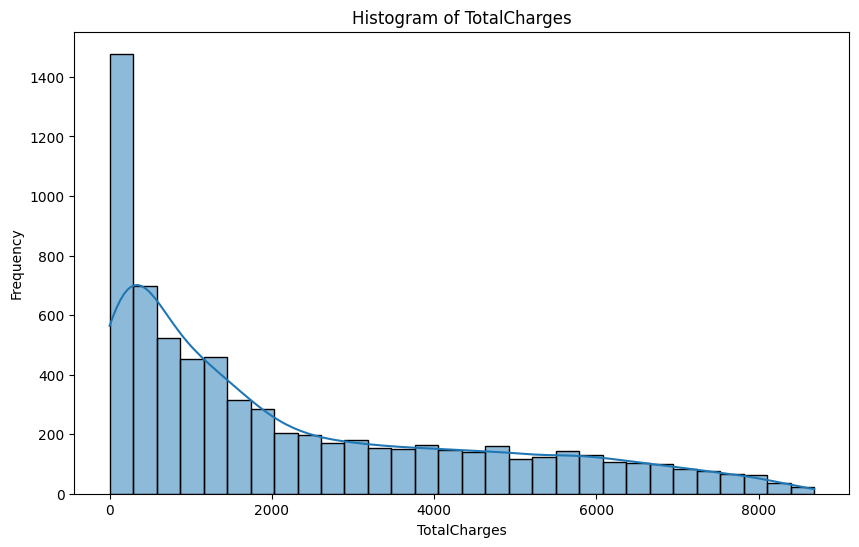

In [17]:
# Histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Histograms show the frequency distribution of the values in each numerical column.The kde=True parameter adds a Kernel Density Estimate (KDE) curve, which smoothens the distribution curve.
This helps in visualizing the shape (e.g., normal, skewed) and spread of the data.

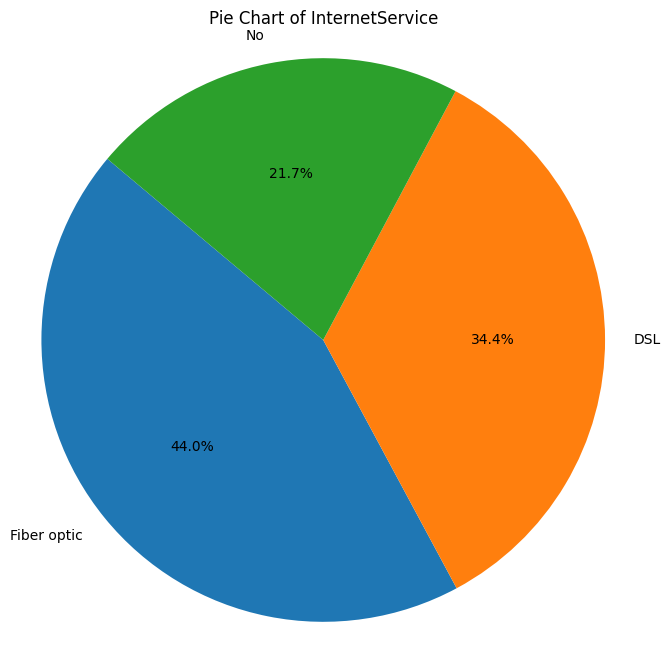

In [18]:
import matplotlib.pyplot as plt

# Define a function to create pie charts for categorical variables
def create_pie_chart(data, column):
    # Get the frequency distribution of the column
    counts = data[column].value_counts()
    labels = counts.index
    sizes = counts.values

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Create pie charts for selected categorical columns
categorical_columns = ['InternetService']

for col in categorical_columns:
    create_pie_chart(df, col)


The pie chart shows the proportion of customers who have churned versus those who have not.
autopct='%1.1f%%' adds percentage labels to each slice of the pie.
This provides a visual representation of the class distribution in the Churn variable.

## **Bivar analysis**

Bivariate analysis is a statistical method that focuses on examining the relationship between two different variables. The main goal is to understand whether and how these two variables are associated or correlated with each other.

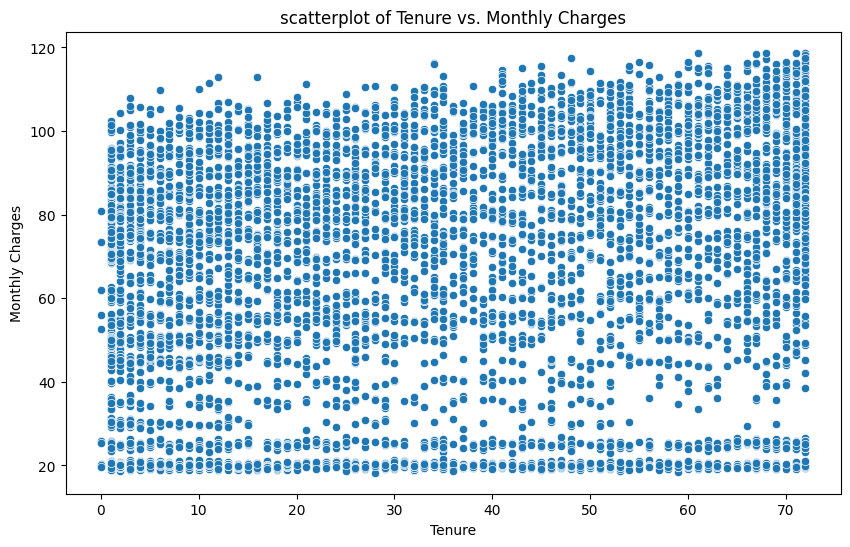

In [30]:
import matplotlib.pyplot as plt

# Scatterplot of Tenure vs. Monthly Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df)
plt.title('scatterplot of Tenure vs. Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()


Scatter plots show the relationship between two numerical variables.
The position of each point indicates the values of the two variables for a particular observation.

X-axis (Tenure): Represents the number of months a customer has been with the service.

Y-axis (Monthly Charges): Represents the amount a customer is charged monthly.

Data Points: Each point on the scatterplot corresponds to a customer's tenure and MonthlyCharges.

this scatterplot helps to visually inspect the relationship between the duration a customer has been with the service and their corresponding monthly charges, which can provide insights into customer behavior and potential billing strategies.

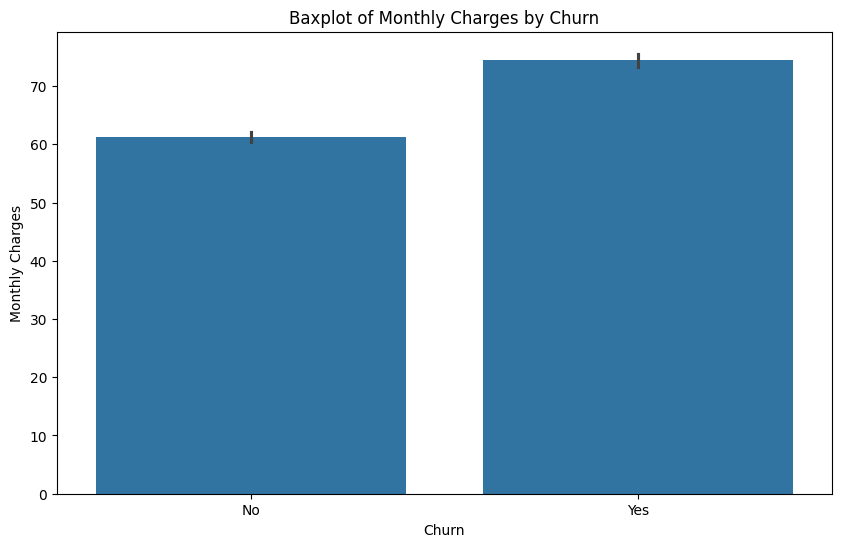

In [38]:
# Boxplot of Monthly Charges by Churn
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Baxplot of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


The boxplot allows you to compare the distribution of monthly charges between customers who churned and those who did not.The central line in each box shows the median monthly charge. If the median for churned customers is higher than that for non-churned customers, it suggests that higher monthly charges might be associated with higher churn rates. If the boxplot shows that churned customers tend to have higher monthly charges, it could imply that higher charges might be a factor influencing churn. Conversely, if non-churned customers have higher charges, it might suggest that they perceive higher value in the service.

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


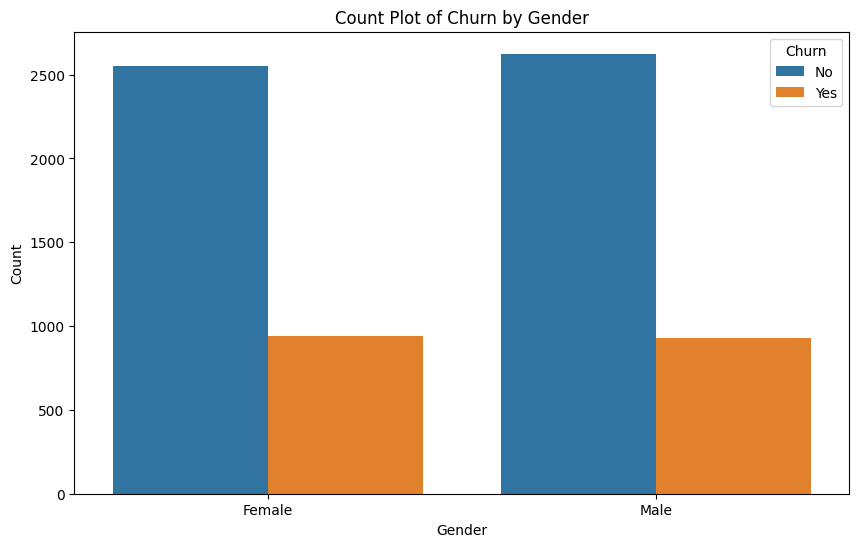

In [22]:
# Cross-tabulation for gender and Churn
cross_tab_gender_churn = pd.crosstab(df['gender'], df['Churn'])
print(cross_tab_gender_churn)

# Bar plot for gender and Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Count Plot of Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


##**Multivar analysis**

Multivariate analysis examines the relationships among multiple variables simultaneously. The main goal of multivariate analysis is to understand the relationships among several variables simultaneously and to explore the structure and patterns within the data. This type of analysis can reveal complex interactions that bivariate analysis might miss.

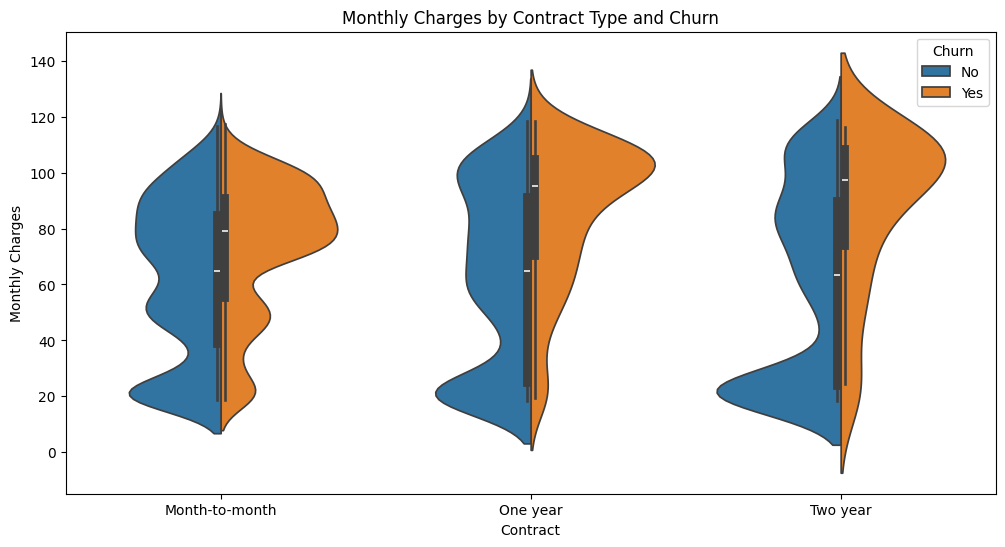

In [26]:
# Violin plot for MonthlyCharges by Contract Type and Churn
plt.figure(figsize=(12, 6))
sns.violinplot(x='Contract', y='MonthlyCharges', hue='Churn', split=True, data=df)
plt.title('Monthly Charges by Contract Type and Churn')
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.show()

The plot aims to show how the MonthlyCharges vary across different Contract types, while also highlighting the differences between customers who churned and those who did not.This violin plot provides a detailed and comparative view of the MonthlyCharges across different Contract types, split by Churn status. It is a powerful tool for understanding the distribution and density of monthly charges, and how these charges might influence or be influenced by customer churn.

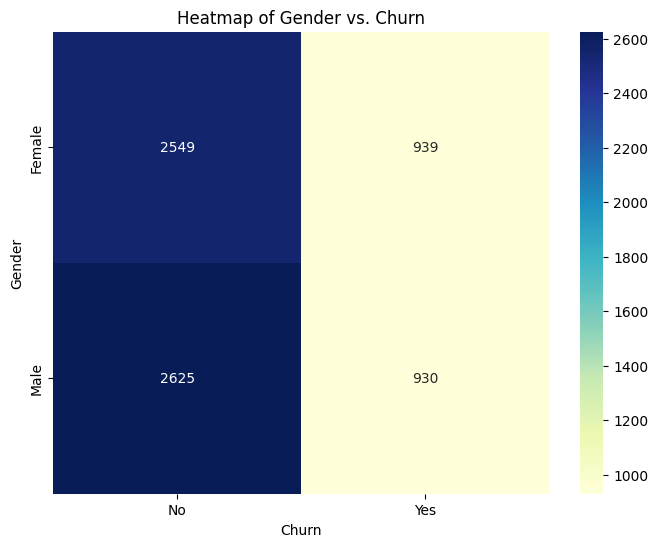

In [28]:
# Heatmap for Gender and Churn
cross_tab_gender_churn = pd.crosstab(df['gender'], df['Churn'])

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_gender_churn, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Gender vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Gender')
plt.show()


The heatmap shows the counts of churned and non-churned customers for each gender. Each cell in the heatmap is annotated with the count of customers that fall into that category.The color gradient represents the counts, with different shades indicating different count ranges. In the YlGnBu color map, lighter colors indicate lower counts and darker colors indicate higher counts.The heatmap shows how churn is distributed across genders, helping to identify if one gender has a higher churn rate than the other.

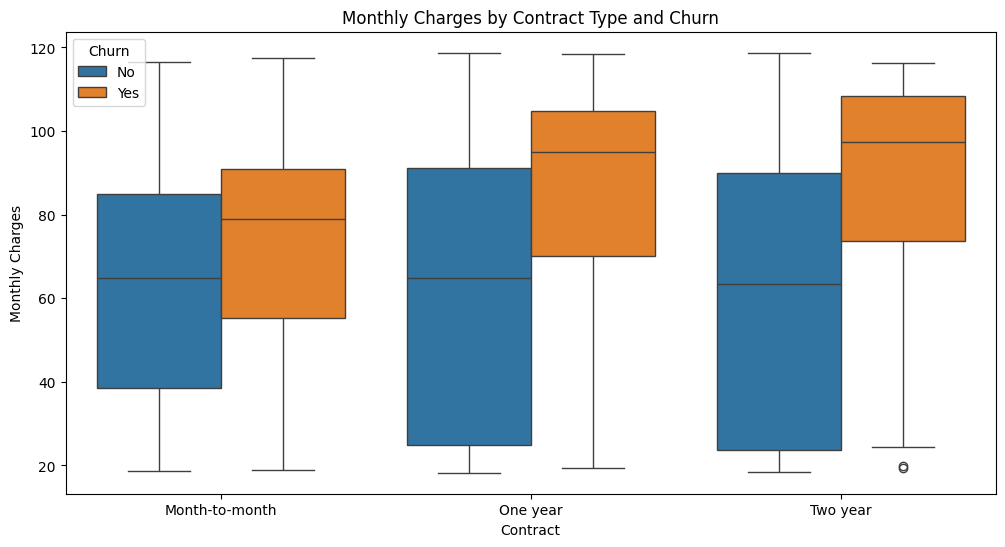

In [29]:
# Box plot for MonthlyCharges by Contract Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Contract Type and Churn')
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.show()


X-axis (Contract): Represents different contract types (e.g., Month-to-month, One year, Two year).

Y-axis (Monthly Charges): Represents the amount a customer is charged monthly.
Boxes: Each box represents the distribution of monthly charges for each contract type. The boxes are split by Churn (e.g., Yes and No).

The central line inside each box shows the median monthly charge.

The edges of the box show the interquartile range (IQR), which represents the middle 50% of the data.
The whiskers extend to 1.5 times the IQR from the first and third quartiles, capturing the range of the bulk of the data.
Points outside the whiskers are considered outliers.